# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 15.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
# display the first few rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
# check the shape of the data set
data.shape

(3454, 15)

* The data has 3454 rows and 15 columns, or 15 attributes and 3454 phones

In [7]:
# check the data types of the columns for data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (float and int type) and 4 string types (object type) columns in the data
* The target variable is the price, which in this case is the 'normalized_used_price' and 'normalized_new_price'.

In [8]:
# statistical summary of the data set
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

###Univariate Analysis

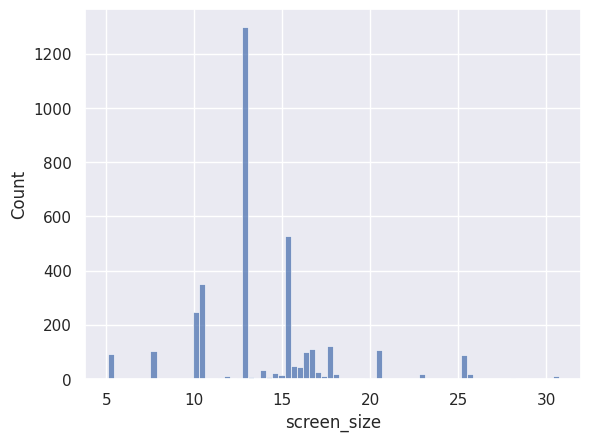

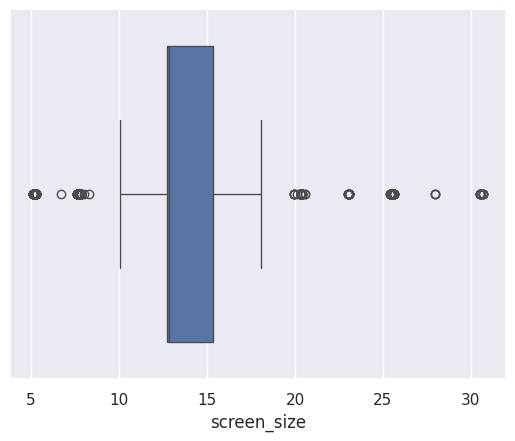

In [9]:
# observations on screen size
sns.histplot(data= data, x ='screen_size')
plt.show()

sns.boxplot(data= data, x = 'screen_size')
plt.show()

* The screen size has most between 10 and 20cm with many outliers on both ends

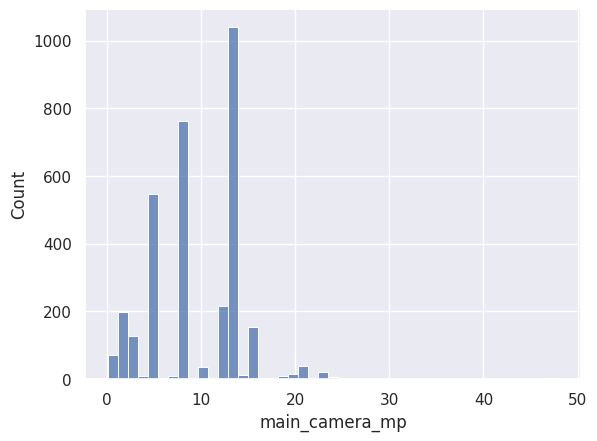

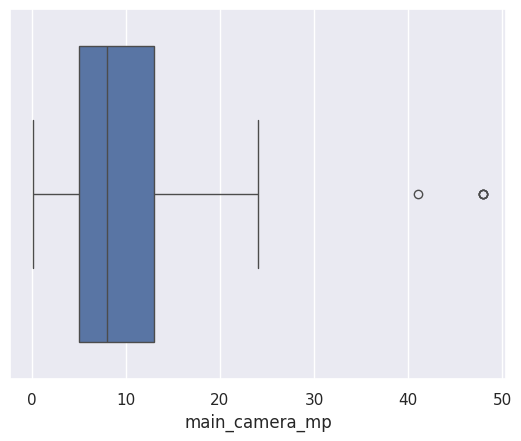

In [10]:
# observations on main_camera_mp
sns.histplot(data= data, x ='main_camera_mp')
plt.show()

sns.boxplot(data= data, x = 'main_camera_mp')
plt.show()

* The Main Camera megapixels are mostly between 0-25mp however have outliers between 40-50mp and Right skewed

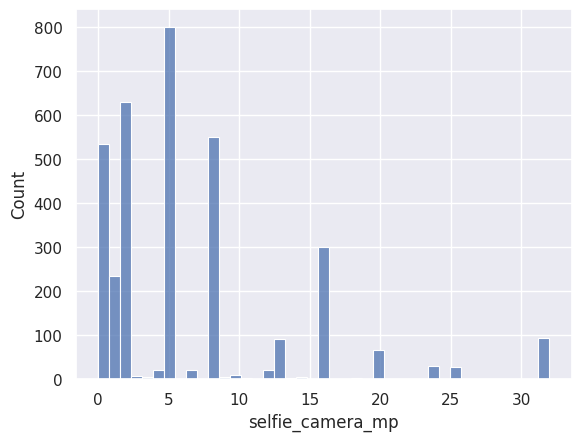

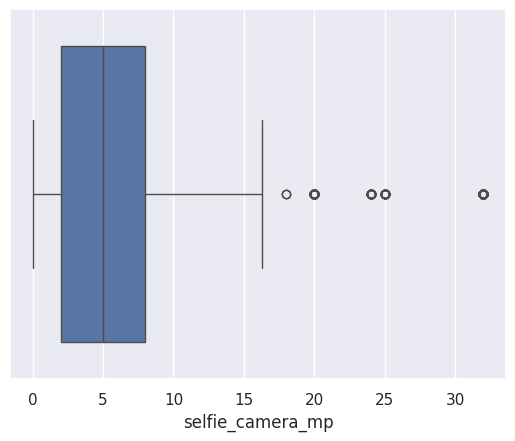

In [11]:
# observations on selfie camera mp
sns.histplot(data= data, x ='selfie_camera_mp')
plt.show()

sns.boxplot(data= data, x = 'selfie_camera_mp')
plt.show()

* The selfie camera mp are mostly between 0-17mp however outliers are noted making this boxplot Right skewed

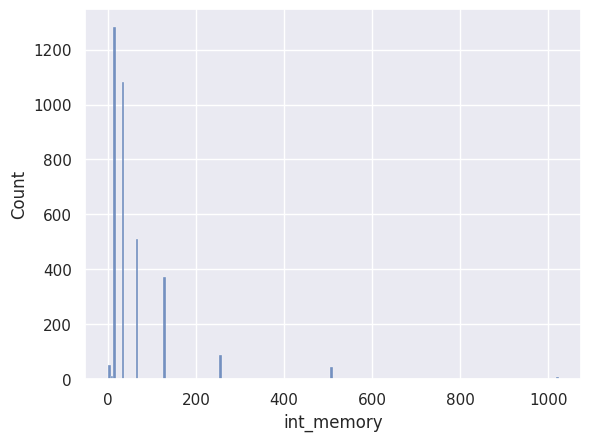

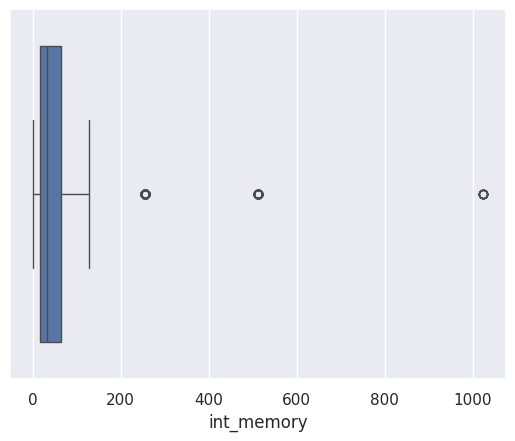

In [12]:
# observations on internal memory
sns.histplot(data= data, x ='int_memory')
plt.show()

sns.boxplot(data= data, x = 'int_memory')
plt.show()

* The internal memory is also right skewed with outliers creating a tail to the right side

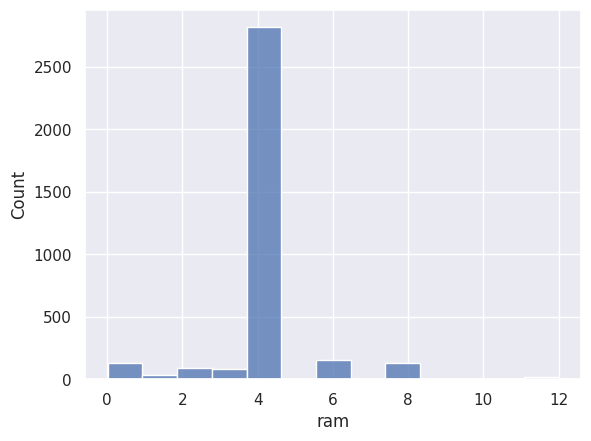

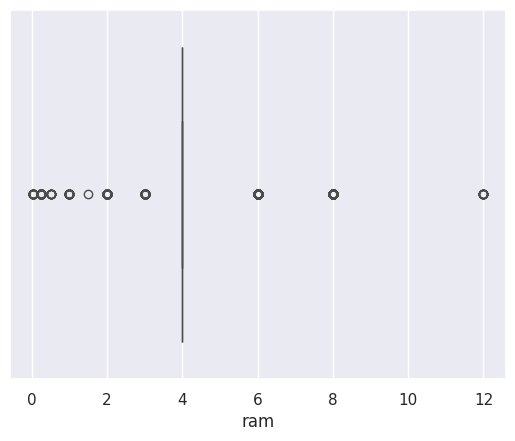

In [13]:
# observations on ram
sns.histplot(data= data, x ='ram')
plt.show()

sns.boxplot(data= data, x = 'ram')
plt.show()

* Most of the devices have ram of 4, however there are devices that possess both higher and lower ram available creating outliers on both sides

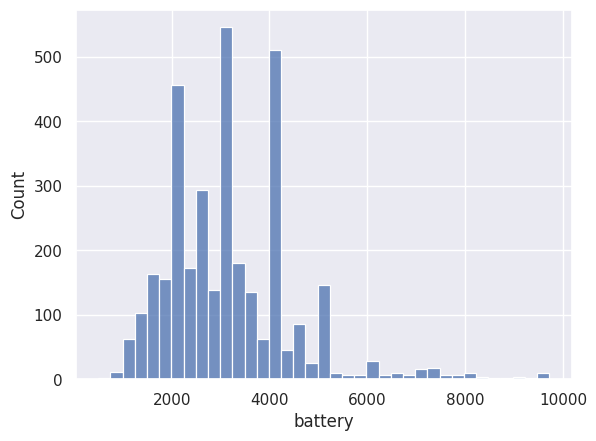

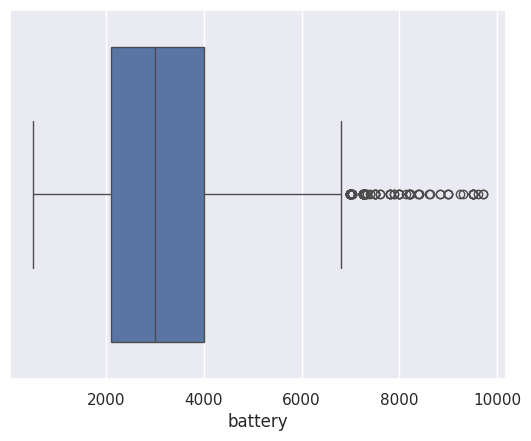

In [14]:
# observations on battery
sns.histplot(data= data, x ='battery')
plt.show()

sns.boxplot(data= data, x = 'battery')
plt.show()

* The battery capacity in mAh is also Right skewed, with most between 2,000-7,000 mAh however skewing to the right, demonstrating devices with increased battery capacity

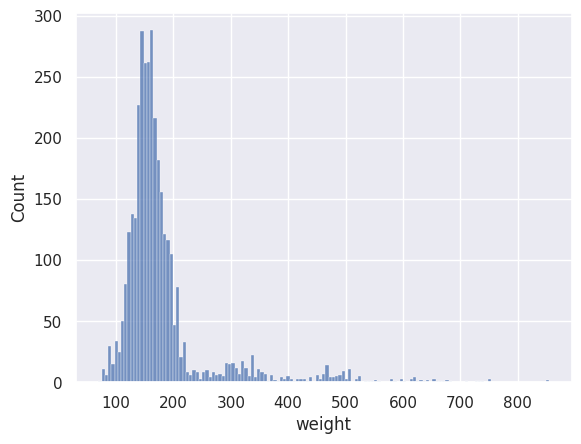

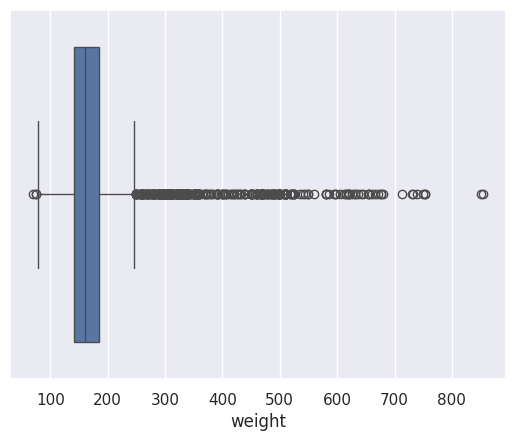

In [15]:
# observations on weight
sns.histplot(data= data, x ='weight')
plt.show()

sns.boxplot(data= data, x = 'weight')
plt.show()

* The weight of devices is Right skewed with most weighing less than 300 grams, however strongly skewed with many devices weighing more than 300g.

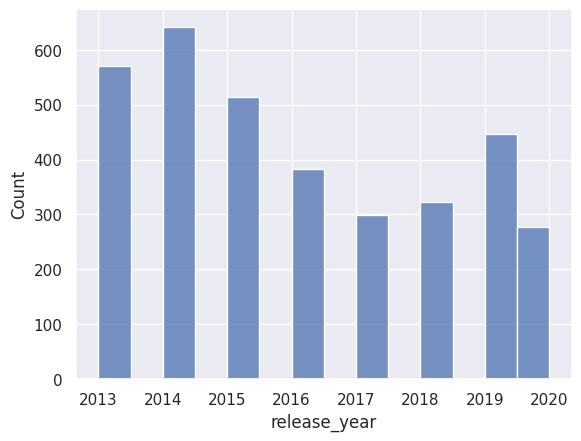

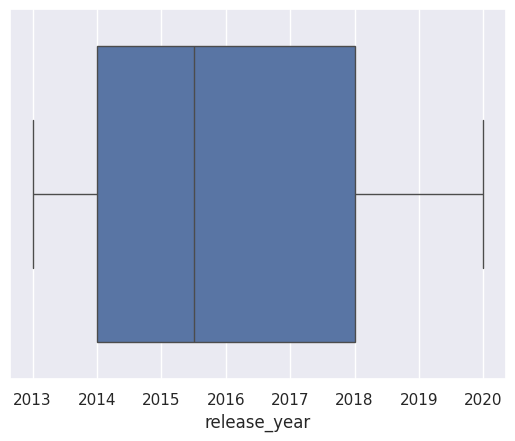

In [16]:
# observations on release year
sns.histplot(data= data, x ='release_year')
plt.show()

sns.boxplot(data= data, x = 'release_year')
plt.show()

* The years 2013, 2014, and 2015 have the most devices released in this data set, followed by 2019

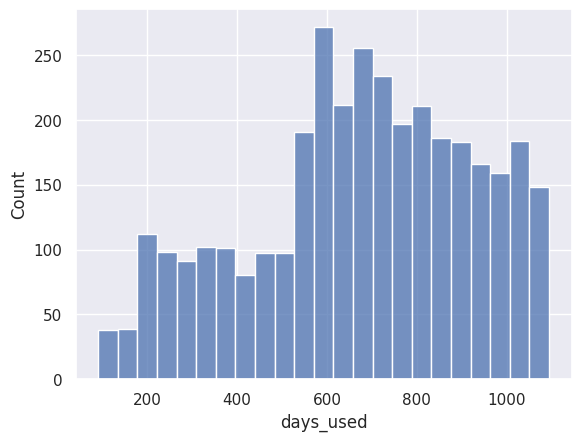

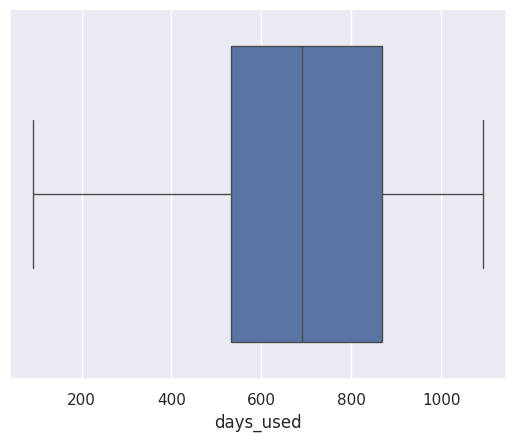

In [17]:
# observations on days used
sns.histplot(data= data, x ='days_used')
plt.show()

sns.boxplot(data= data, x = 'days_used')
plt.show()

* The Days Used is Left skewed with peak noted at ~600 days used.

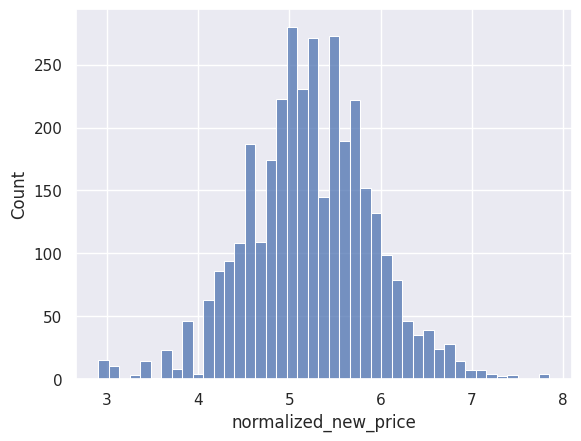

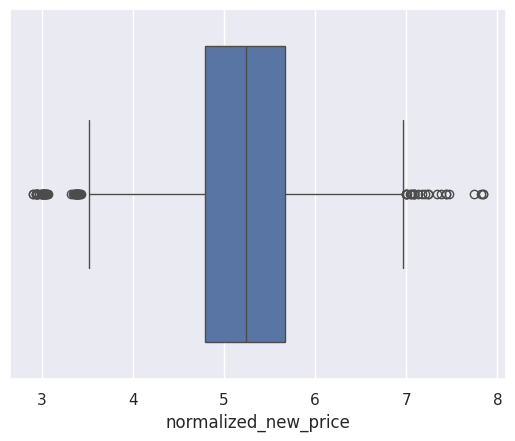

In [18]:
# observations on normalized new price
sns.histplot(data= data, x ='normalized_new_price')
plt.show()

sns.boxplot(data= data, x = 'normalized_new_price')
plt.show()

* The normalized new price is close to normal but presents with outliers on both sides; while below, normalized used price appears slightly skewed to the left.

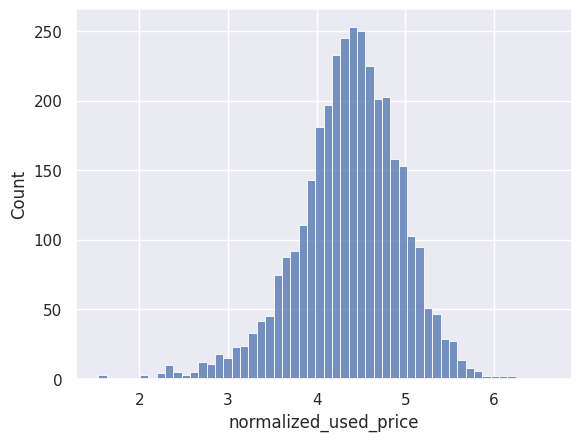

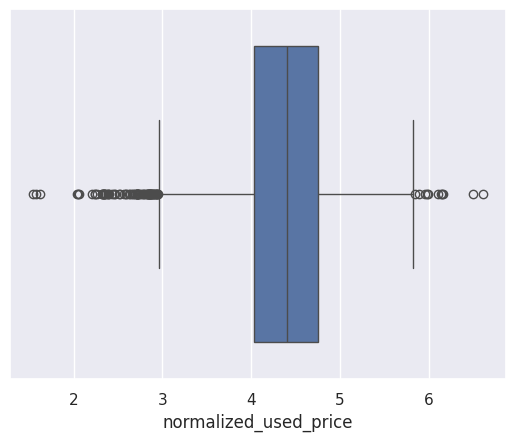

In [19]:
# observations on normalized used price
sns.histplot(data= data, x ='normalized_used_price')
plt.show()

sns.boxplot(data= data, x = 'normalized_used_price')
plt.show()

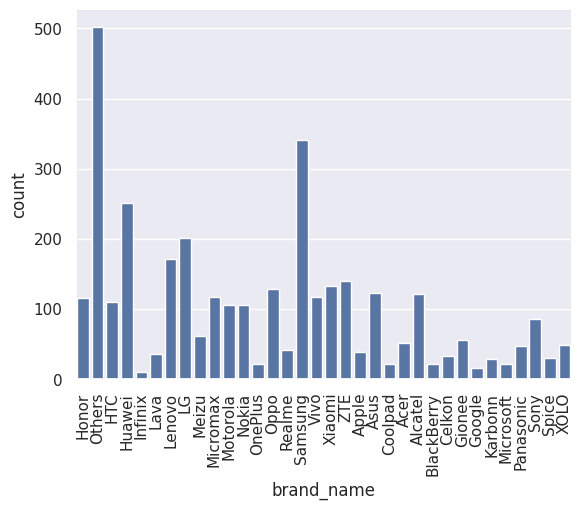

In [20]:
# observations on brand name
sns.countplot(data = data, x = 'brand_name')
plt.xticks(rotation=90)
plt.show()

* The brand name shows that the category "Others" is the highest followed by "Samsung" then "Huawei".

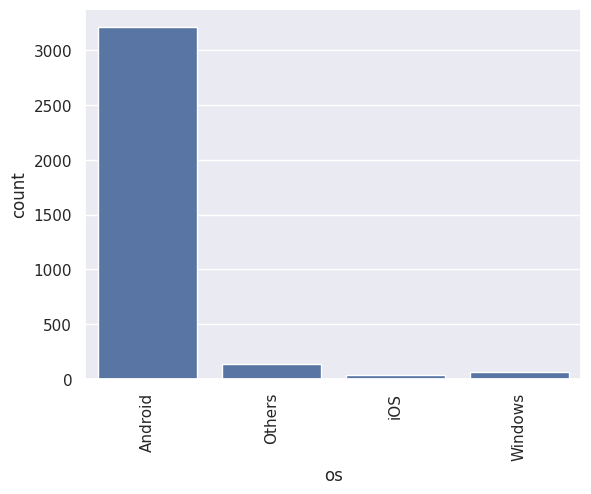

In [21]:
# observations on OS
sns.countplot(data = data, x = 'os')
plt.xticks(rotation=90)
plt.show()

* The majority of devices in this data set use "Android" OS while iOS is used the least.

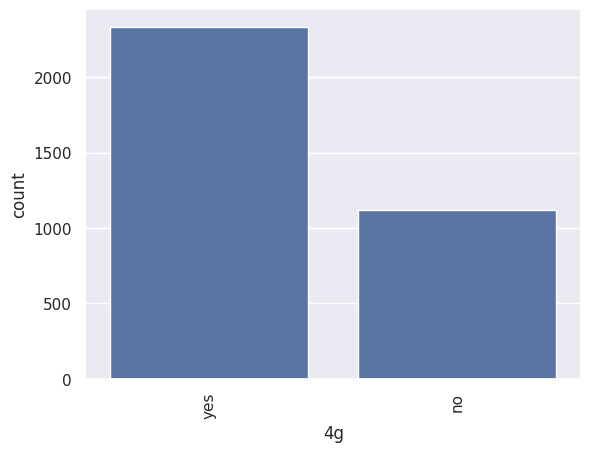

In [22]:
# observations on 4g
sns.countplot(data = data, x = '4g')
plt.xticks(rotation=90)
plt.show()

* More devices have 4g available than do not

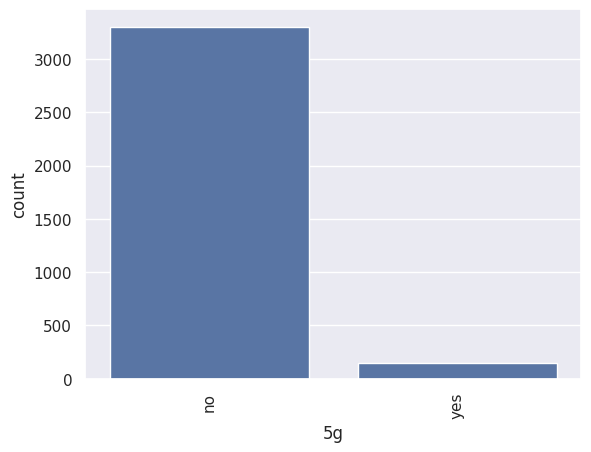

In [23]:
# observations on 5g
sns.countplot(data = data, x = '5g')
plt.xticks(rotation=90)
plt.show()

* More devices do not have 5g available

###Addressing Questions / Bivariate Analysis

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

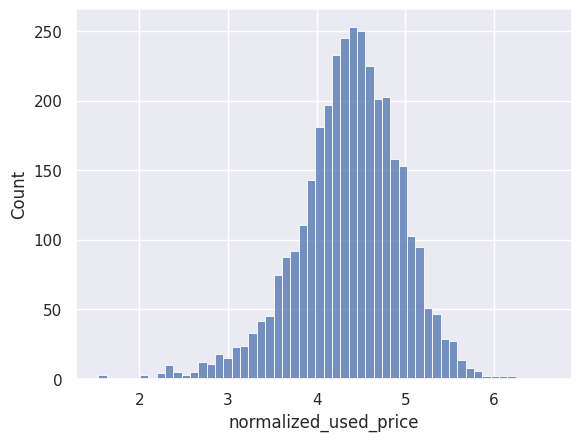

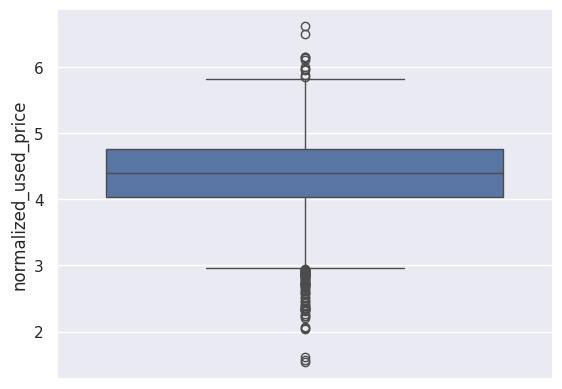

In [24]:
# observations on the distribution of Normalized Used Device Prices
sns.histplot(data['normalized_used_price'])
plt.show()

sns.boxplot(data['normalized_used_price'])
plt.show()

* As noted earlier, the normalized used price is slightly skewed to the left. The box plot helps visualize outliers in both directions

In [25]:
# percentage of use device market dominated by Android
data['os'].value_counts(normalize=True)

,proportion
os,
Android,0.930515
Others,0.039664
Windows,0.019398
iOS,0.010423


* Android dominates 93% of the used devices in this data set.

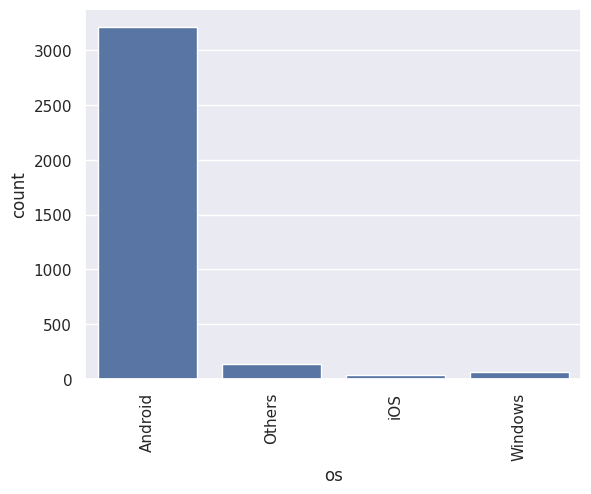

In [26]:
#observations of OS Device
sns.countplot(data= data, x = 'os')
plt.xticks(rotation=90)
plt.show()

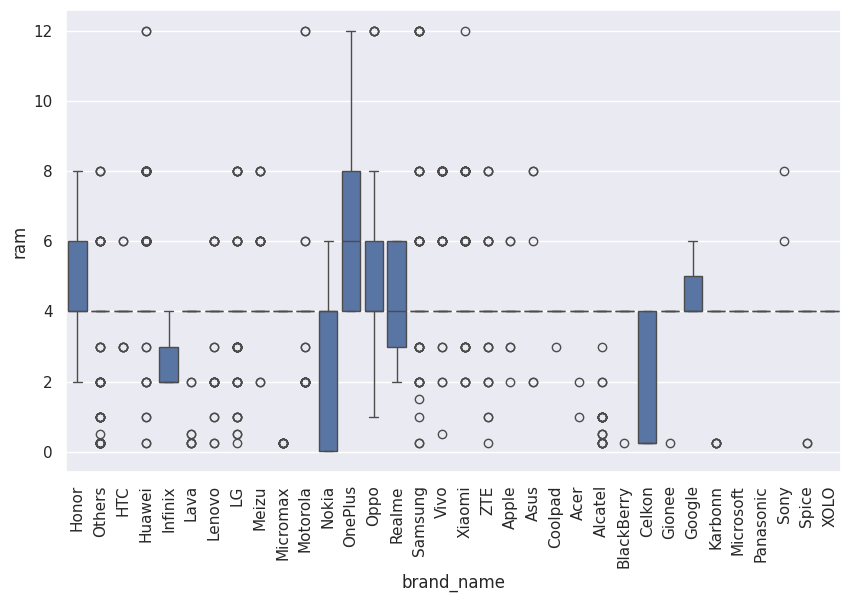

In [27]:
# observations on the amount of RAM that varies with the Brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand_name', y='ram', data=data)
plt.xticks(rotation=90)
plt.show()

* The OnePlus offers devices with the most RAM available.
* In addition, some other brands noted to offer higher RAM includes "Honor", "Oppo", "Realme" and "Karbonn".
* Brands that offer RAM of 12 include "OnePlus", "Huawei", "Motorola", "Oppo", "Samsung", "Xiaomi"

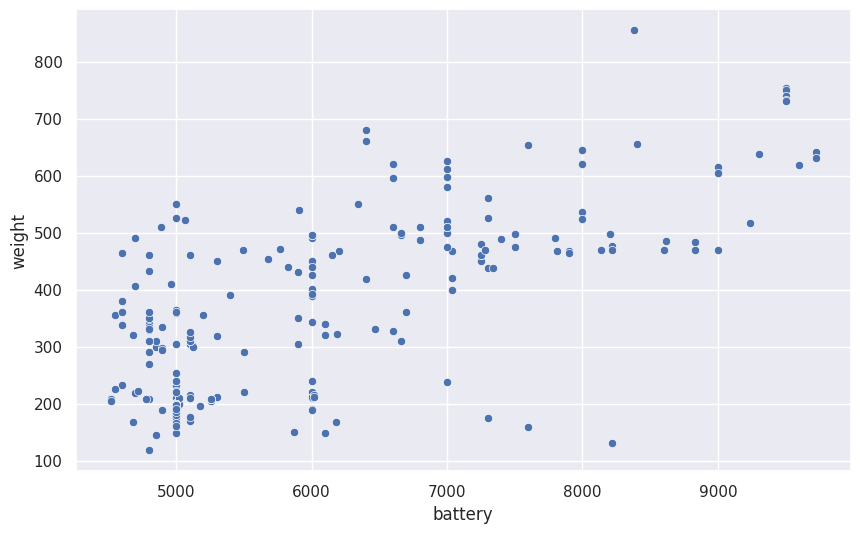

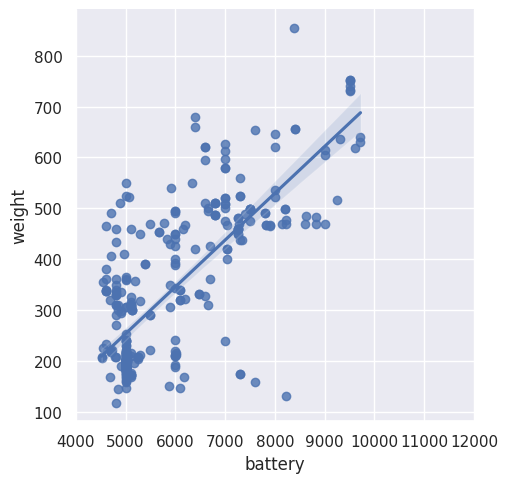

In [28]:
# observations on how weight varies with battery size (>4500 mAH)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery', y='weight', data=data[data['battery'] > 4500])
plt.show()

sns.lmplot(x='battery', y='weight', data=data[data['battery'] > 4500])
plt.xlim(4000, 12000)
plt.show()


* There is a positive correlation noted between increased battery size (>4500) and weight of device

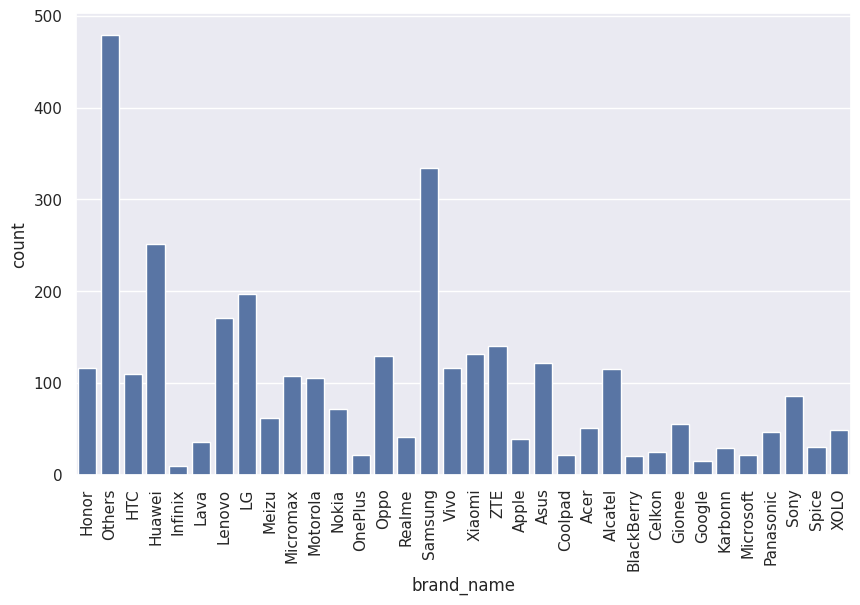

In [29]:
# observations on number of devices across different brands with a larger screen size (>6 inches)
plt.figure(figsize=(10, 6))
sns.countplot(x='brand_name', data=data[data['screen_size'] > 6])
plt.xticks(rotation=90)
plt.show()

* The brand with the most devices that have larger screen size (>6 inches) is "Others" followed by "Samsung" then "Huawei".

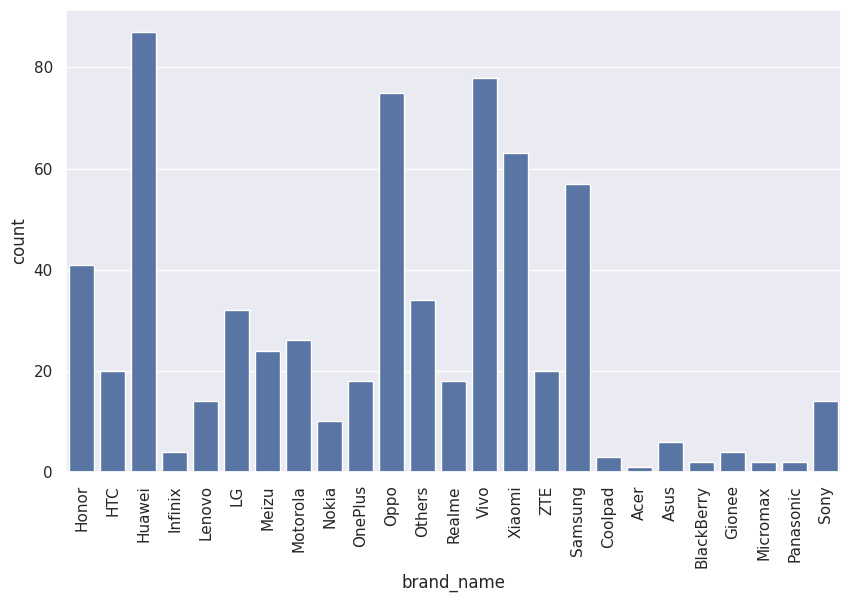

In [30]:
# observations on distributions of devices with selfie cameras (>8MP) across brands
plt.figure(figsize=(10, 6))
sns.countplot(x='brand_name', data=data[data['selfie_camera_mp'] > 8])
plt.xticks(rotation=90)
plt.show()

* The brand that has selfie camera with higher megapixels (>8MP) is "Huawei" followed by "Vivo" then "Oppo".

In [31]:
# creating list of numeric columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

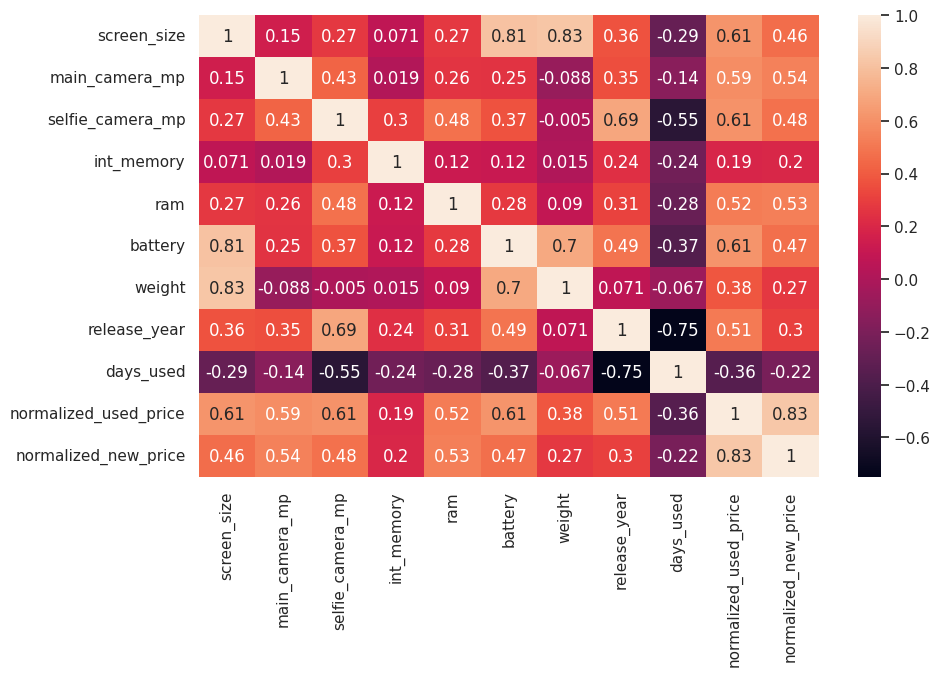

In [32]:
# observations on attributes with high correlation with normalized price of used device
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True)
plt.show()

* When comparing variables to the Normalized Price of Used Devices, the strongest positive correlation is noted between "Normalized Used Price" and Normalized New Price" at 0.83 followed by positive correlations with Screen Size, Selfie Camera MP and Battery (all at 0.61).
* All correlations with Normalized Used Price and other variables are positively correlated with exception of "Days Used" with weak negative correlation of -0.36

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [33]:
# checking for duplicate values
data.duplicated().sum()

0

In [34]:
# checking for missing values
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


* There is missing data in many columns

In [35]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

* The main camera mp is missing 179 as compared to selfie camera mp which is missing 2 values
* Int memory, ram, battery, and weight are all missing a few values within the set.

In [36]:
# df.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


* Learning more about the missing data and looking for patterns

In [37]:
# extracting all the information of other variables where int_memory is null
df.loc[df['int_memory'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


In [38]:
# extracting all the information of other variables where ram is null
df.loc[df['ram'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


In [39]:
# extracting all the information of other variables where battery is null
df.loc[df['battery'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905


In [40]:
# extracting all the information of other variables where main camera mp is null
df.loc[df['main_camera_mp'].isnull()==True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


* For the variables above, we will impute the missing values in each column with the median grouped by 'brand_name' and 'OS'

In [41]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(
    value=df.groupby(['os', 'brand_name'])['main_camera_mp'].transform('median')
)
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(
    value=df.groupby(['os', 'brand_name'])['selfie_camera_mp'].transform('median')
)
df['int_memory'] = df['int_memory'].fillna(
    value=df.groupby(['os', 'brand_name'])['int_memory'].transform('median')
)
df['ram'] = df['ram'].fillna(
    value=df.groupby(['os', 'brand_name'])['ram'].transform('median')
)
df['battery'] = df['battery'].fillna(
    value=df.groupby(['os', 'brand_name'])['battery'].transform('median')
)
df['weight'] = df['weight'].fillna(
    value=df.groupby(['os', 'brand_name'])['weight'].transform('median')
)

df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


* For the variable 'main_camera_mp', we will impute the remaining missing values with the median grouped by 'OS'

In [42]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(
    value=df.groupby(['os'])['main_camera_mp'].transform('median')
)

df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


* All the missing values have been treated

## Feature Engineering

In [43]:
df['brand_name'].value_counts()

,count
brand_name,
Others,502
Samsung,341
Huawei,251
LG,201
Lenovo,171
ZTE,140
Xiaomi,132
Oppo,129
Asus,122


In [44]:
df['brand_name'].nunique()

34

* There are >30 brand names included in this data set. Most of which are under the labeled category "Others" at a count of 502, followed by "Samsung" at 341, and "Huawei" at 251. Most of the remainder of the brands are less than 200 count.
* "Others" may possibly be a category encompassing smaller brands or devices not assigned to the rest of the brand name categories.
* We must take into consideration how much value this column brings to the modeling in the next few steps.

In [45]:
df['os'].value_counts()

,count
os,
Android,3214
Others,137
Windows,67
iOS,36


* There are 4 categories of OS in the data set with Android having the highest count at 3,214

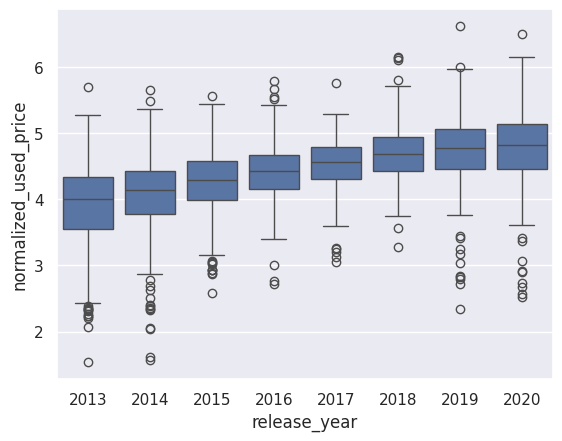

In [46]:
sns.boxplot(x='release_year', y='normalized_used_price', data=df)
plt.show()

* Given this data was collected in year 2021, we can take the difference between 2021 and 'release_year' to get the Years Since Released

In [47]:
df["years_since_released"] = 2021 - df['release_year']
df.drop(["release_year"], axis=1, inplace=True)
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_released
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


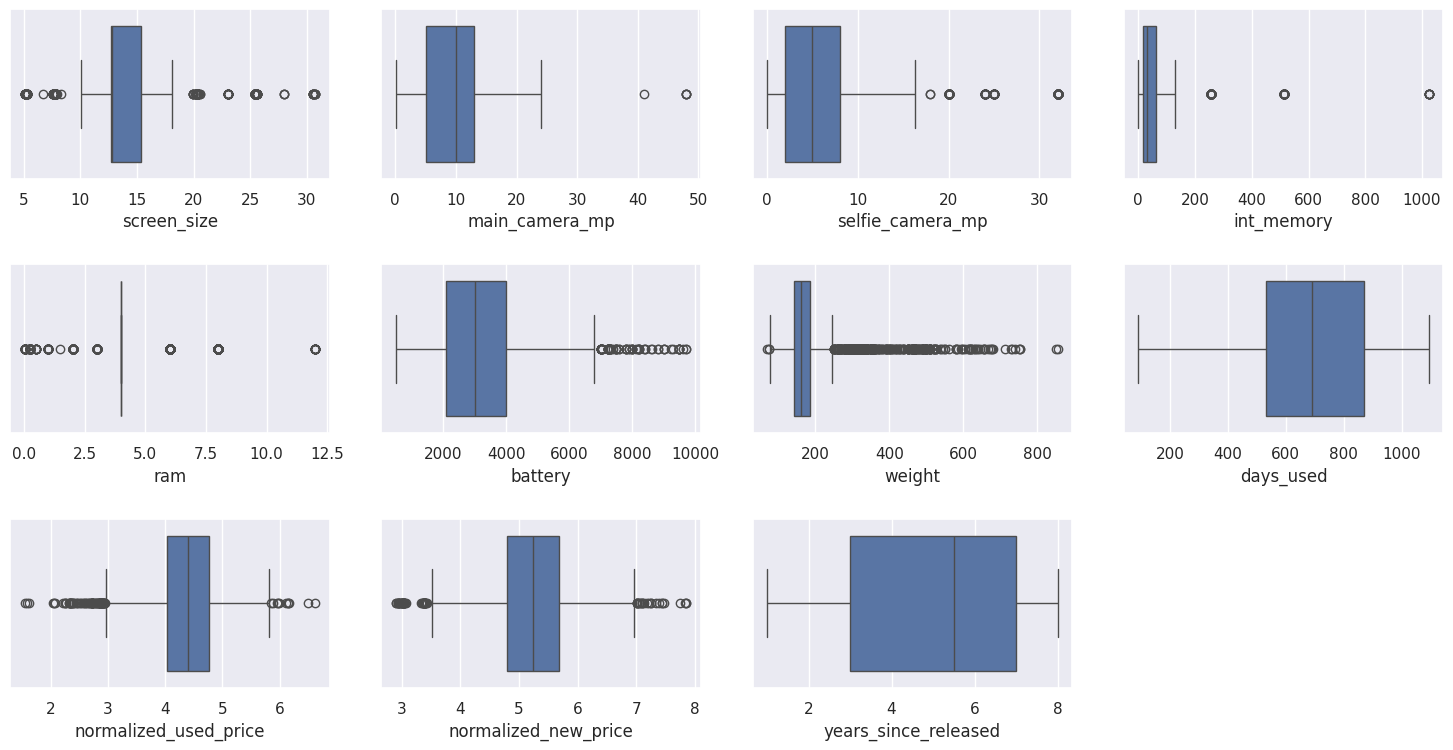

In [48]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are quite a few outliers noted in the boxplots above
* However, we will not treat them as they are proper values
* Of note, devices are having more capabilities including increased capacities in different features of the devices and we'd like to know how this affects pricing.
* We will drop the column 'Brand Name' as it contains too many unique values and can be excluded from modeling

In [49]:
# drop Brand Name from data set
df.drop(['brand_name'], axis=1, inplace=True)
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_released
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


## Data Preparation for Modeling

* We want to predict the cost of used device, or 'normalized_used_price'
* Before we build a model, we have to encode categorical features
* We'll split the data to train and test data to evaluate the model that we build on the train data

In [50]:
# defining x and y variables
X = df.drop(['normalized_used_price'], axis=1)
y = df['normalized_used_price']

print(X.head())
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        25.50  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_released  
0                     1  
1                     1  
2                     1  
3                     1  
4         

In [51]:
# add the intercept to the data
X = sm.add_constant(X)

In [52]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object']).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_released,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,False,False,False,True,False


In [53]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_released,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,1.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# splitting the data into 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

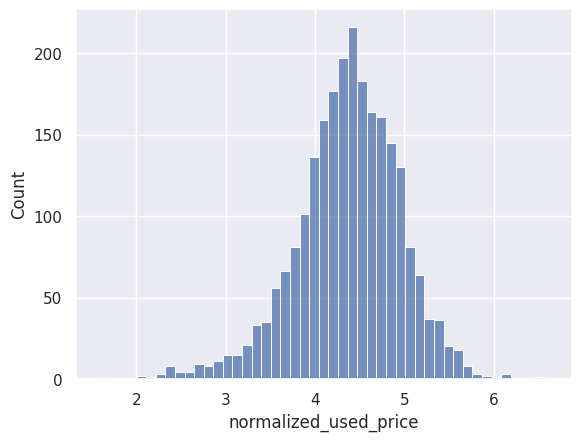

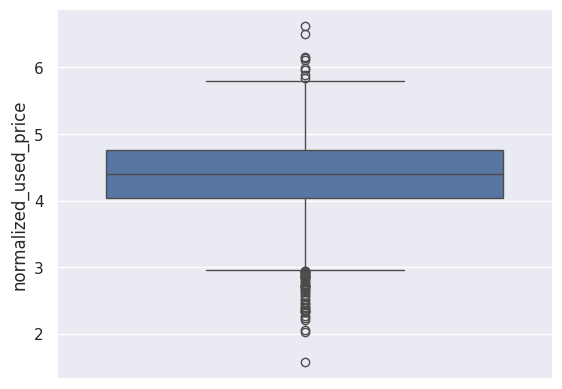

In [56]:
# observations on distributions of Normalized Used Device Prices
sns.histplot(y_train)
plt.show()

sns.boxplot(y_train)
plt.show()

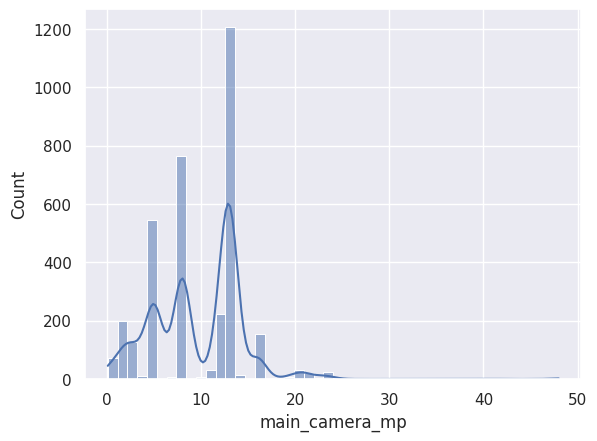

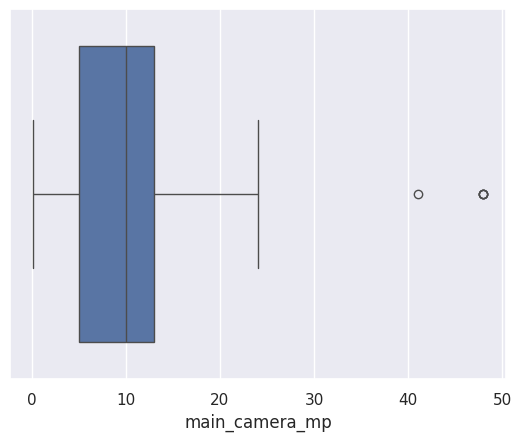

In [57]:
# observations on distributions of Main Camera MP
sns.histplot(df['main_camera_mp'], kde=True)
plt.show()

sns.boxplot(data = df, x = 'main_camera_mp')
plt.show()

* Now that missing data has been addressed by imputing the median by brand name and OS, some of the numerical columns may have changed.
* The Median Camera MP is noted to be Right skewed and similar to the visuals prior to imputation.

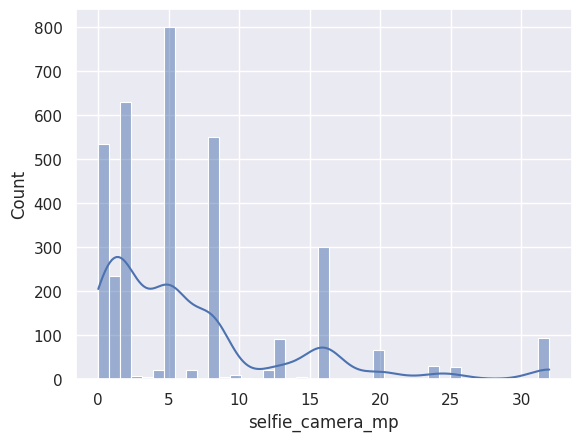

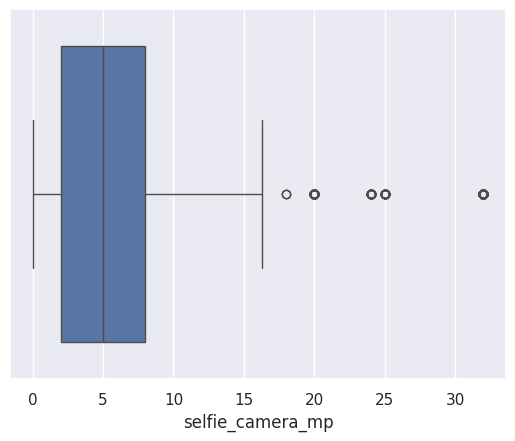

In [58]:
# observations on distributions of Selfie Camera MP
sns.histplot(df['selfie_camera_mp'], kde=True)
plt.show()

sns.boxplot(data = df, x = 'selfie_camera_mp')
plt.show()

* The Selfie Camera MP continues to demo Right skewed pattern

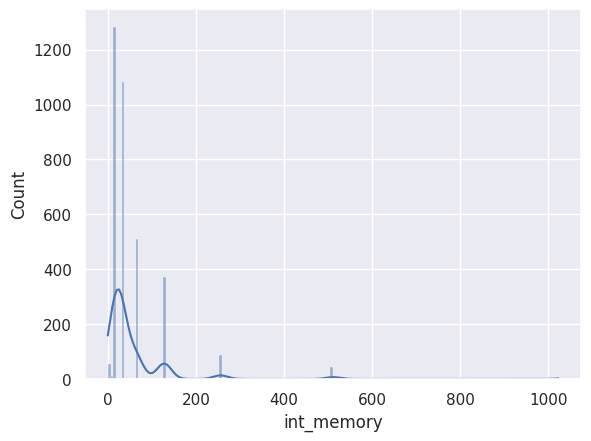

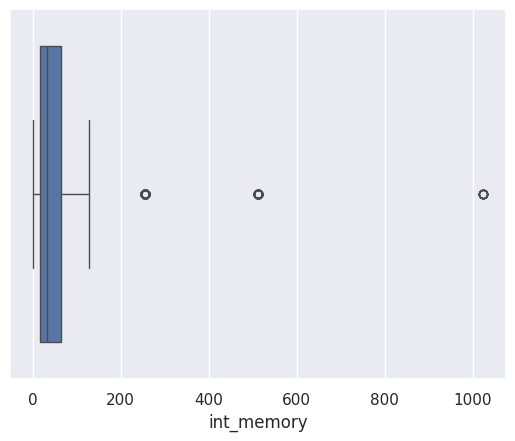

In [59]:
# observations on distributions of Internal Memory
sns.histplot(df['int_memory'], kde=True)
plt.show()

sns.boxplot(data = df, x = 'int_memory')
plt.show()

* The internal memory continues to demo Right skewed data as some devices offer higher internal memory

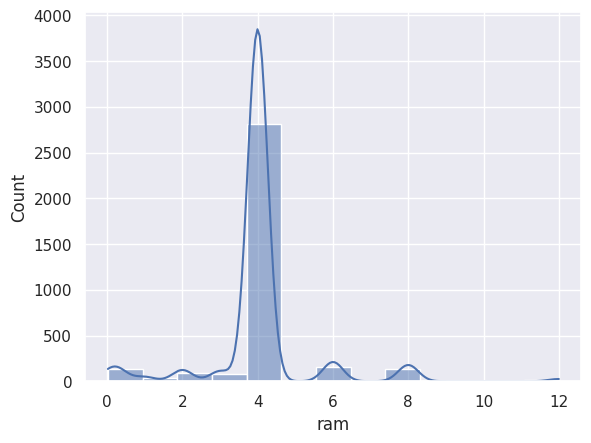

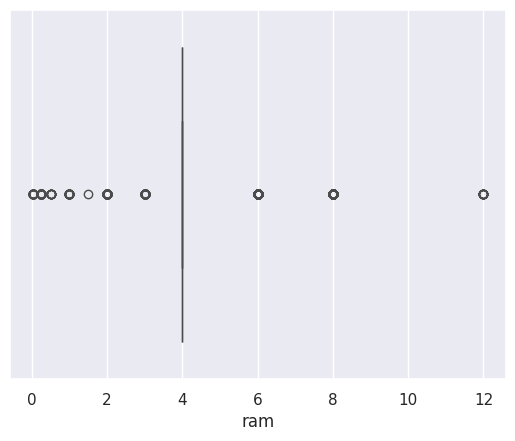

In [60]:
# observations on distributions of RAM
sns.histplot(df['ram'], kde=True)
plt.show()

sns.boxplot(data = df, x = 'ram')
plt.show()

* RAM of 4 is this highest count with outliers on both sides as devices are offered with more or less RAM

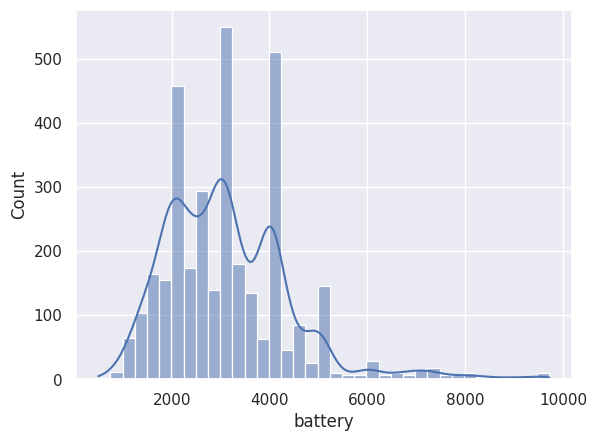

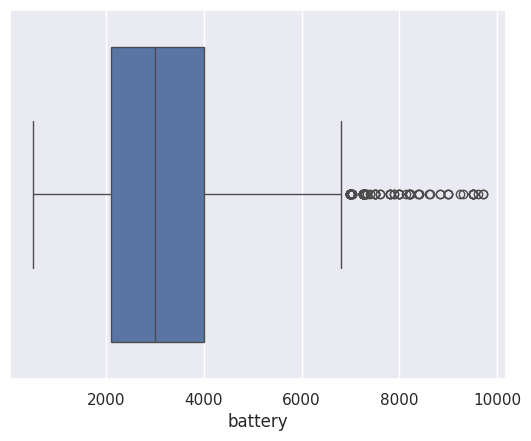

In [61]:
# observations on distributions of Battery
sns.histplot(df['battery'], kde=True)
plt.show()

sns.boxplot(data = df, x = 'battery')
plt.show()

* The battery is also skewed to the right, with outliers to the right indicating fewer devices that offer increase in battery energy capacity

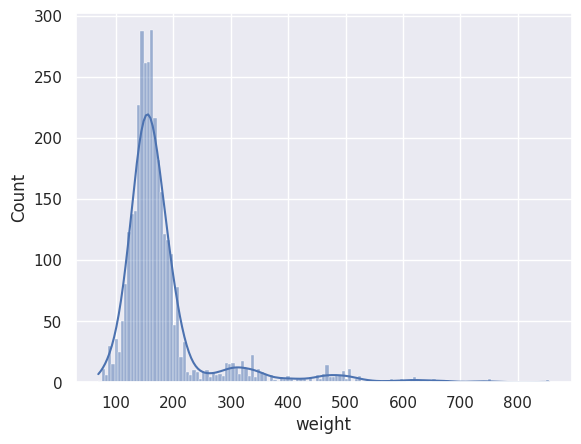

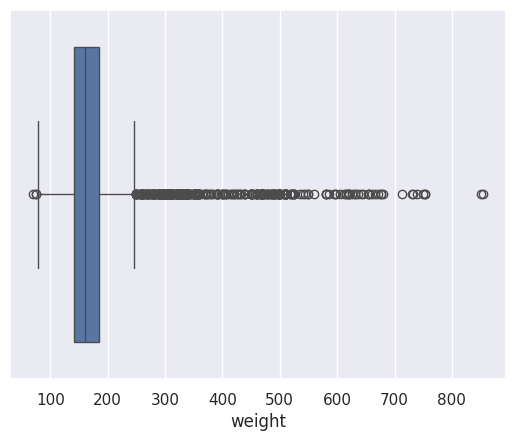

In [62]:
# observations on distributions of Weight
sns.histplot(df['weight'], kde=True)
plt.show()

sns.boxplot(data = df, x = 'weight')
plt.show()

* Weight of devices is skewed to the right with most under 300g however, many outliers to the right indicating devices offered in bigger sizes/ increased weight.

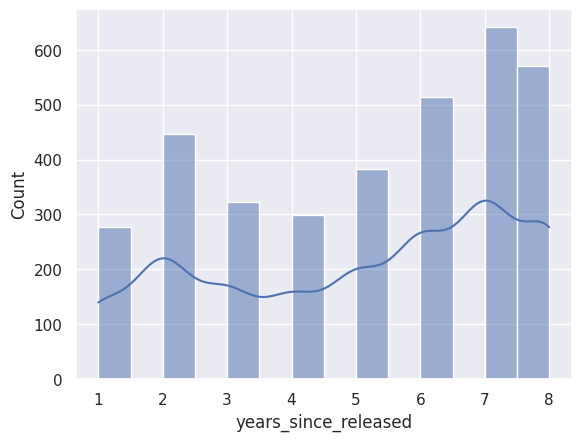

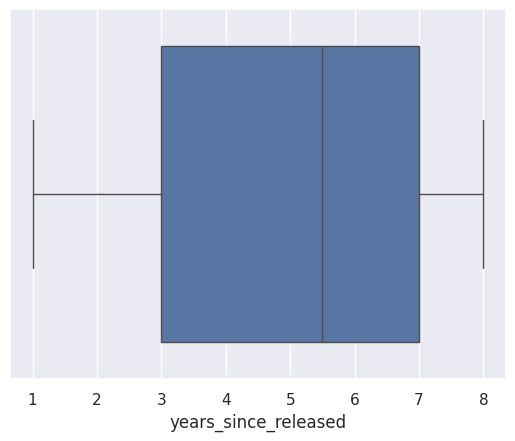

In [63]:
# observation on years since released
sns.histplot(df['years_since_released'], kde=True)
plt.show()

sns.boxplot(data = df, x = 'years_since_released')
plt.show()

* Most devices have increased number of years since released.
* This may indicate many of the devices in this data set are older devices compared to new, with 7 years old having the highest count

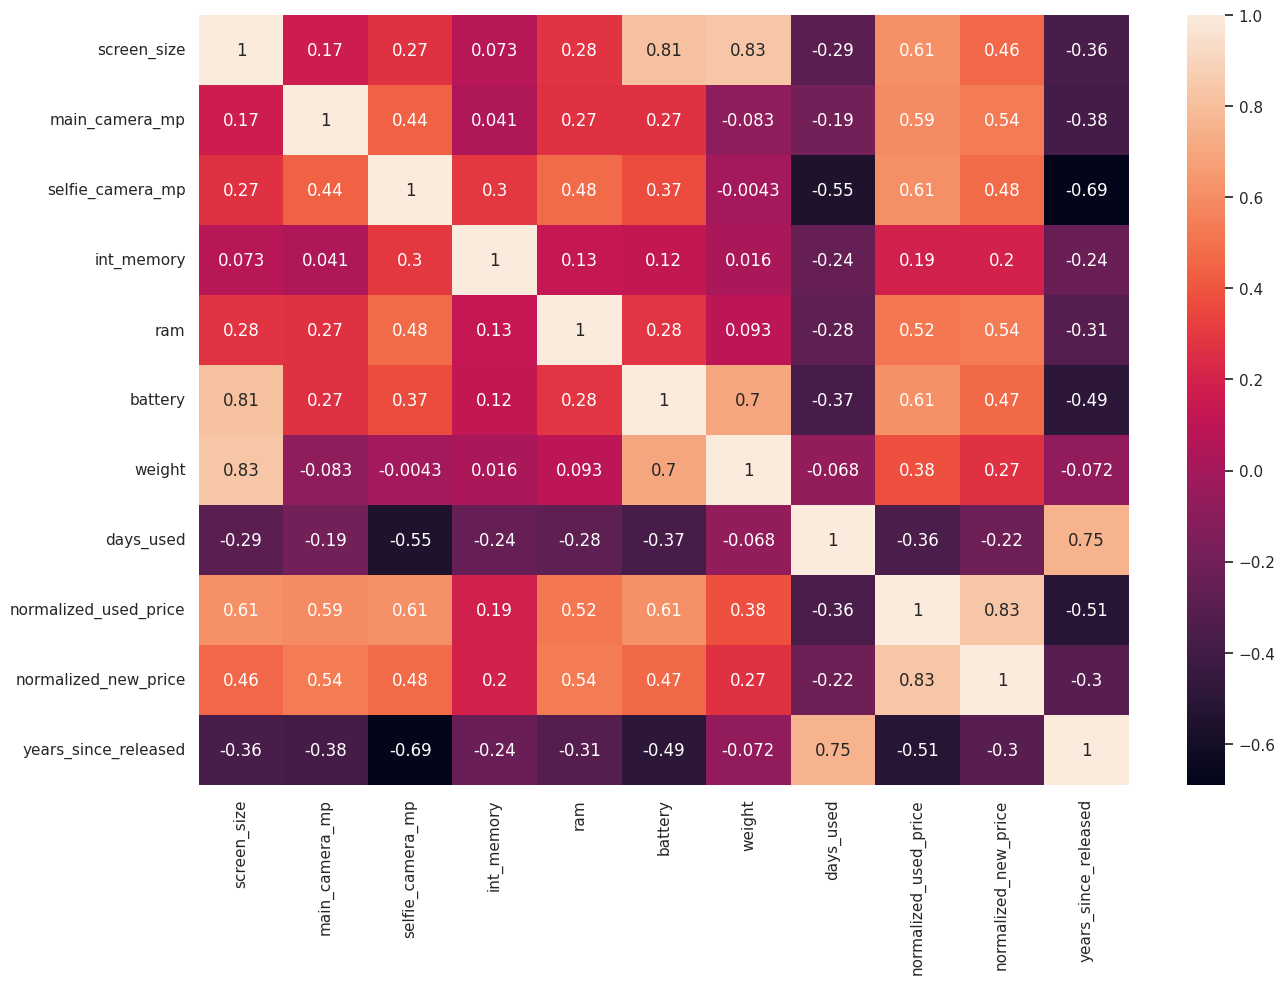

In [64]:
# checking correlation with addition of new numerical columns

plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()


* After changing the column of "released year" to "Years since released", we now have 2 variables with a negative correlation to Normalized Used Price which are "Years Since Released" and "Days Used".

## Model Building - Linear Regression

In [65]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     849.8
Date:                   Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                           22:27:36   Log-Likelihood:                 97.701
No. Observations:                   2417   AIC:                            -163.4
Df Residuals:                       2401   BIC:                            -70.76
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Interpreting the Regression Results:
1. Adjust R-Squared: reflects the fit of our model
  - In our case, the value is 0.841 which is good
2. const Coefficient: the y intercept
  - The value for const coefficient is 1.3658
3. Coefficient of a predictor variable: represents the change in the output Y due to a change in the predictor variable (everything else held constant)
  - In this case, the coefficient of screen size is 0.0254 while selfie_camera_mp is 0.0139

## Model Performance Check

We will use different metrics to check the performance of the model
* We will use metric functions defined in sklearn for RMSE, MAE, and $R^2$
* We will define a function to calculate MAPE and adjusted $R^2$
* We will create a function in which will print out all the above functions in one go

In [66]:
# function to compute adjusted R squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check performance of a regression model

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    #predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred) # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred) # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred)) # to compute RMSE
    mae = mean_absolute_error(target, pred) # to compute MAE
    mape = mape_score(target, pred) # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0]
    )

    return df_perf

In [67]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232385,0.182174,0.841493,0.840436,4.375213


In [68]:
#checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236542,0.182939,0.84487,0.842437,4.465787


Observations:
* The training $R^2$ is 0.84, so the model is not underfitting
* The train and test RMSE and MAE are comparable, so the model is not overfitting either
* MAE suggests that the model can predict the Normalized Used Price within a mean error of 0.18 on the test data
* MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the Normalized Used Price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. No Multicollinearity
2. Linearity of Variables
3. Independence of error terms
4. Normality of error terms
5. No heteroscedasticity

Test for Multicollinearity
* One way is by using the Variance Inflation Factor, or VIF.
* Our plan is to define a function to check VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['Features'] = predictors.columns

    # calculating VIF for each feature
    vif['VIF'] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [70]:
checking_vif(x_train)

,Features,VIF
0,const,123.999237
1,screen_size,7.242562
2,main_camera_mp,2.011451
3,selfie_camera_mp,2.577600
4,int_memory,1.248141
5,ram,2.123863
6,battery,3.859962
7,weight,6.129901
8,days_used,2.576877
9,normalized_new_price,2.633144


* There are multiple columns with higher VIF's indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

Removing Multicollinearity

1. Drop every column one by one that has a VIF score greater than 5
2. Look at the Adjusted R-Squared and RMSE of all these models
3. Drop the variable that makes the least change in adjusted R-squared
4. Check the VIF scores again
5. Continue until all the VIF scores are under 5

In [71]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjust R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
      # defining the new train set
      train = predictors.loc[:,~predictors.columns.str.startswith(cols)]

      #create the model
      olsmodel = sm.OLS(target, train).fit()

      #adding adj. R-squared and RMSE to the lists
      adj_r2.append(olsmodel.rsquared_adj)
      rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj R-squared after dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values("Adj R-squared after dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp



In [72]:
col_list = ['screen_size','weight']

res=treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj R-squared after dropping col,RMSE after dropping col
0,weight,0.837126,0.235612
1,screen_size,0.836675,0.235939


In [73]:
col_to_drop='weight'
x_train2 = x_train.loc[:,~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:,~x_test.columns.str.startswith(col_to_drop)]

#check VIF again
vif = checking_vif(x_train2)
print('VIF after dropping ', col_to_drop)
vif

VIF after dropping  weight


,Features,VIF
0,const,107.191674
1,screen_size,3.411088
2,main_camera_mp,1.916384
3,selfie_camera_mp,2.543963
4,int_memory,1.247766
5,ram,2.119922
6,battery,3.476100
7,days_used,2.563822
8,normalized_new_price,2.626707
9,years_since_released,4.469089


* Now that we have dealt with multicollinearity, we will rebuild the model using updated set of predictor variables

In [74]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     888.0
Date:                   Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                           22:27:37   Log-Likelihood:                 71.885
No. Observations:                   2417   AIC:                            -113.8
Df Residuals:                       2402   BIC:                            -26.92
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Interpreting Regression Results:
* std err: reflects the level of accuracy of the coefficients (lower it is, higher the accuracy)
* p-value : we are considering 0.05 (5%) as significance level. Therefore, a p-value less than 0.05 is considered statistically significant.
* Confidence Interval: represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

Observations:
* We can see that the Adjusted R-squared changed from 0.841 to 0.837
* As there is no multicollinearity, we will now look at p-values of predictor values to check their significance

Dealing with High P-Values
* Our plan is to build a model, check the p-values, and drop the column with highest p-value. Then, create a new model with without the dropped feature, check the p-values of the variables and drop the column with highest p-value. Repeating the steps until there are no columns with with p-value >0.05. We can use a loop to accomplish this and be more efficient.

In [75]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) >0:
  # defining the train set
  x_train_aux = predictors[cols]

  # fitting the model
  model = sm.OLS(y_train, x_train_aux).fit()

  # getting the p-values and the max p-value
  p_values = model.pvalues
  max_p_value = max(p_values)

  # name of the variable with maximum p-value
  feature_with_p_max = p_values.idxmax()

  if max_p_value > 0.05:
    cols.remove(feature_with_p_max)
  else:
    break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_released', '4g_yes']


In [76]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [77]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1554.
Date:                   Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                           22:27:37   Log-Likelihood:                 69.428
No. Observations:                   2417   AIC:                            -120.9
Df Residuals:                       2408   BIC:                            -68.74
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [78]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235119,0.184178,0.837741,0.837134,4.418073


In [79]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238645,0.184323,0.8421,0.840716,4.491314


Observations:
* Now no feature has a p-value >0.05, so we will consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with
* Now adjusted R-squared is 0.837, so our model is able to explain ~84% of the variance
* The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.841
  * This shows the variables we dropped were not affecting the model
* RMSE and MAE are comparable for train and test sets, indicating the model is not overfitting

Next, we will check the rest of the assumptions olsmod2
* Linearity of Variables
* Independence of Error Terms
* Normality of Error Terms
* No Heteroscedasticity

Test for Linearity and Independence

In [80]:
# create a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred['Actual Values'] = y_train # actual values
df_pred['Fitted Values'] = olsmod2.fittedvalues # predicted values
df_pred['Residuals'] = olsmod2.resid # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.864795,0.222693
1525,4.448399,4.570969,-0.122570
1128,4.315353,4.283832,0.031520
3003,4.282068,4.259029,0.023039
2907,4.456438,4.450197,0.006241


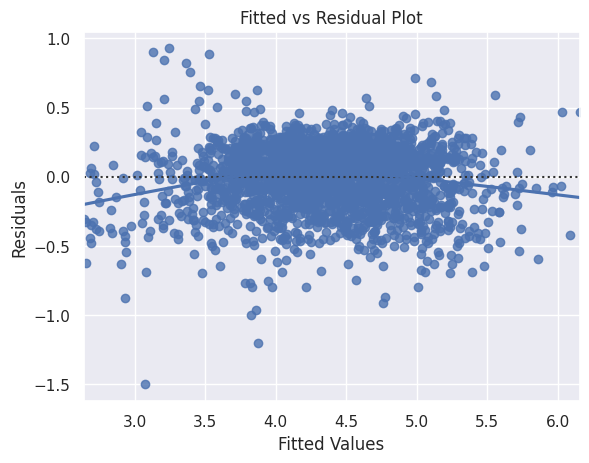

In [81]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x = 'Fitted Values', y = 'Residuals',
    lowess=True
)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title("Fitted vs Residual Plot")
plt.show()

* We see no pattern in the plot, therefore, the assumptions of linearity and independence are satisfied.

Test for Normality

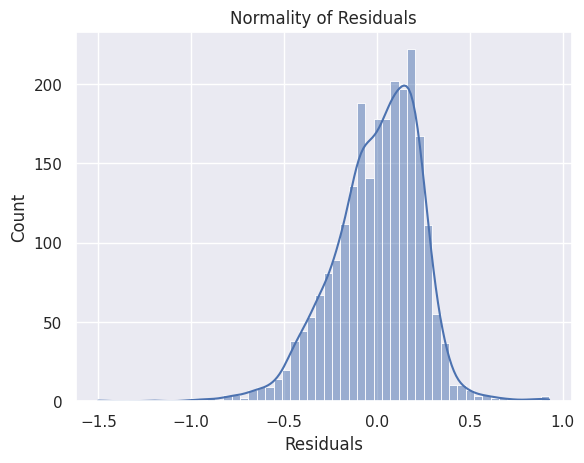

In [82]:
sns.histplot(df_pred['Residuals'], kde=True)
plt.title("Normality of Residuals")
plt.show()

* The histogram of residuals shows bell shape but slightly L skewed due to a longer tail on the left side.  
* Let's check the Q-Q plot

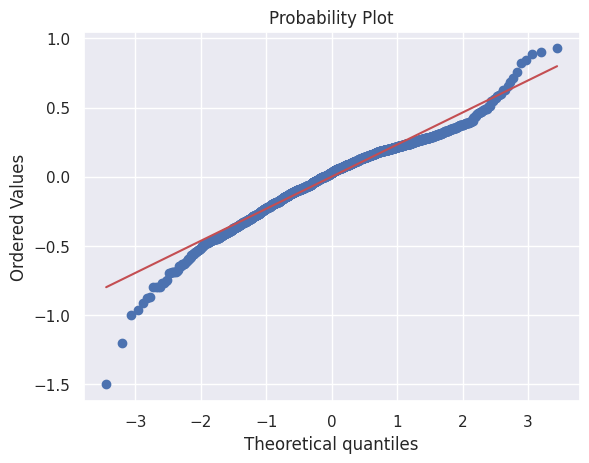

In [83]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow the linear relationship with significant deviation at the tails
* Let's check the Shapiro- Wilk Test

In [84]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9712623350218808, pvalue=1.289700389318169e-21)

As the p-value is < 0.05, the residuals are not normal as per the Shapiro-Wilks test. Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept the distribution as close to normal and therefore, assumption is satisfied

Test for Homoscedasticity

In [85]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train3)
lzip(name, test)

[('F statistic', 1.066224512476473), ('p-value', 0.13347499863533777)]

* Since p-value is > 0.05, we can say that residuals are homoscedastic. Therefore, this assumption is satisfied.

In [86]:
# predictions on test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.377113
2341,3.696103,3.961003
1913,3.592093,3.766837
688,4.306495,4.104347
650,4.522115,5.122198
2291,4.259294,4.397895
40,4.997685,5.409155
1884,3.875359,4.111095
2538,4.206631,4.049581
45,5.380450,5.307172


## Final Model

In [87]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [88]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1554.
Date:                   Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                           22:27:40   Log-Likelihood:                 69.428
No. Observations:                   2417   AIC:                            -120.9
Df Residuals:                       2408   BIC:                            -68.74
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [89]:
# checking model performance on train set (seen 70%)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
    )
olsmodel_final_train_perf


Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235119,0.184178,0.837741,0.837134,4.418073


In [90]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
    )
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238645,0.184323,0.8421,0.840716,4.491314


* The model is able to explain 84% of variation in the data
* The train and test RMSE and MAE are low and comparable, therefore, the model is not suffering from overfitting
* The MAPE on the test data suggests we can predict within 4.5% of the used devices prices
* Hence, we can conclude the model olsmodel_final is good for prediction

## Actionable Insights and Recommendations

1. The model is able to explain 84% of variation in the data and within 4.5% of the used devices prices on the test data, which is good
  * This is indicates the model is good for prediction as well as inference purposes
2. If the screen size increases by 1 unit, then it's pricing increases by 0.0432 units, all other variables held constant.
3. If the Main Camera MP increases by 1 unit, then it's pricing increases by 0.0187 units, all other variables held constant.
4. If the Self Camera MP increases by 1 unit, then it's pricing increases by 0.0133 units, all other variables held constant.
5. If the RAM increases by 1 unit, then it's pricing increases by 0.0159 units, all other variables held constant.
6. If the Years Since Released increases by 1 unit, the price for used devices decreases by 0.0192, all other variables held constant.
7. Given that features such as screen size, camera MP and RAM have been demonstrated to have an effect on pricing, we should consider the following:
  * The OnePlus offers devices with the most RAM available. In addition, some other brands noted to offer higher RAM includes "Honor", "Oppo", "Realme" and "Karbonn".
  * The brand that has selfie camera with higher megapixels (>8MP) is "Huawei" followed by "Vivo" then "Oppo".
  * The brand with the most devices that have larger screen size (>6 inches) is "Others" followed by "Samsung" then "Huawei".
* Re-Cell should consider marketing these brands to potential customers and highlighting these features in order to attract more customers.
8. When comparing variables to the Normalized Price of Used Devices, the strongest positive correlation is noted between "Normalized Used Price" and "Normalized New Price" at 0.83 followed by positive correlations with Screen Size, Selfie Camera MP and Battery (all at 0.61).
If the Normalized New Price increases by 1 unit, the pricing for used devices increases by 0.4258, all other variables held constant. This variable holds a high coefficient and has a larger impact on the predicted value of the dependent variable (holding other variables constant).
* Therefore, ReCell may consider increasing the amount of used devices that already have high Normalized New Price in stock and available for customers. This may include newer models with a lower Years Since Released (as Years Since Released has a negative correlation and effect on used device pricing).
9. In the future, consider gathering data on customers such as age, gender, occupation to explore patterns in population preferences and better target audiences with marketing.



___

In [91]:
%%shell
  jupyter nbconvert --to html /content/SLF_Project_LearnerNotebook_FullCode_CMB.ipynb

[NbConvertApp] Converting notebook /content/SLF_Project_LearnerNotebook_FullCode_CMB.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 57 image(s).
[NbConvertApp] Writing 2511423 bytes to /content/SLF_Project_LearnerNotebook_FullCode_CMB.html
